In [45]:
from matplotlib.pyplot import *
% matplotlib inline
from numpy import *
from astropy.io import ascii
import DragScriptV5 as DS

In [46]:
avionics = 0.211
rocket = 4.58-0.211####mass has been adjusted
dry_motor = 1.264 - 0.745
wet_motor = 1.264

print rocket + avionics

4.58


In [47]:
thrust_profile = 'K535_thrust.txt'
rocket_mass = avionics+rocket  #kg
time_res = 0.005
motor_mass = dry_motor
propellant_mass = wet_motor - dry_motor
burn_time = 2.8 # sec
temp = 10.   # Density of air varies with temperature


print rocket_mass + motor_mass  + propellant_mass
print rocket_mass + motor_mass


5.844
5.099


MECO at 2.81 sec, at 355.45 m
Apogee at 19.07 sec, at 1846.74 m
MECO at 215.74 m/s


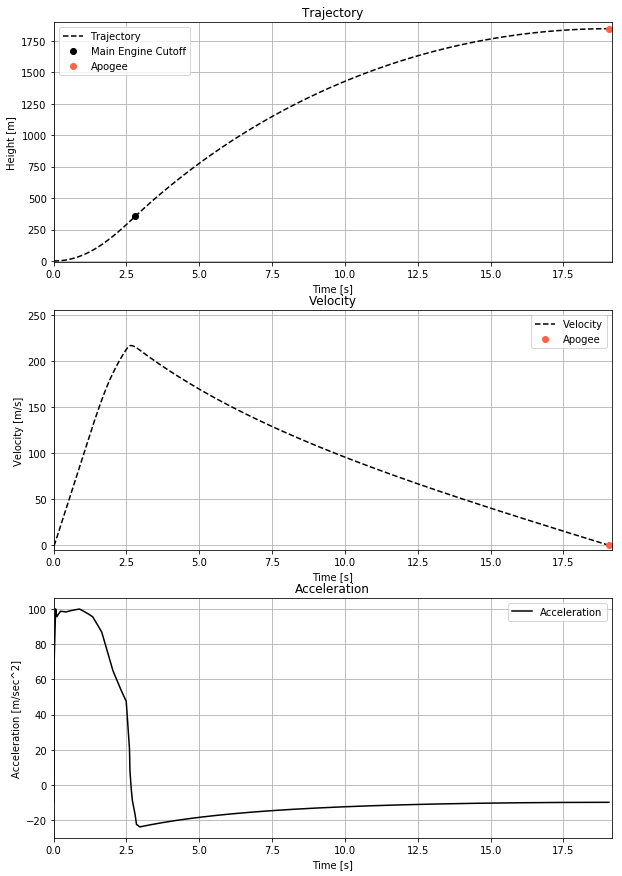

In [48]:
time, velocity, acceleration, height, mass, apogee, MECO_vel = DS.num_solver(thrust_profile, rocket_mass, motor_mass, propellant_mass, time_res, temp, burn_time, 1)

In [49]:
################altitude open rocket###############################

t_openr_alt = ascii.read('time vs alt.csv')['t']
alt_openr = ascii.read('time vs alt.csv')['a']

t_openr_vel = ascii.read('time vs velocity.csv')['t']
vel_openr = ascii.read('time vs velocity.csv')['v']

t_openr_acc = ascii.read('time vs accel.csv')['t']
acc_openr = ascii.read('time vs accel.csv')['a']


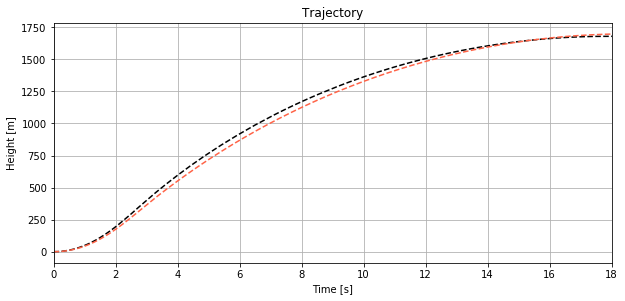

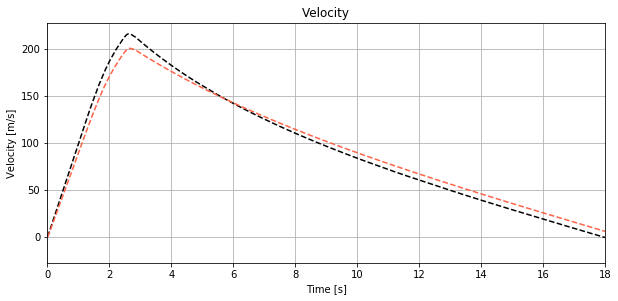

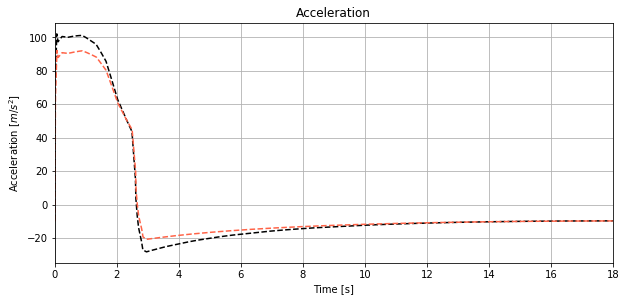

In [38]:
figure(figsize=(10, 15))
subplot(3,1,1)
plot(t_openr_alt, alt_openr, '--', color = 'black', label = 'Open Rocket Trajectory')
plot(time, height, '--', color = 'tomato', label = 'Trajectory')
xlim(0, 18)
grid()
title('Trajectory')
xlabel('Time [s]')
ylabel('Height [m]')

figure(figsize=(10, 15))
subplot(3,1,1)
plot(t_openr_vel, vel_openr, '--', color = 'black', label = 'Open Rocket Velocity')
plot(time, velocity, '--', color = 'tomato', label = 'Velocity')
xlim(0, 18)
grid()
title('Velocity')
xlabel('Time [s]')
ylabel('Velocity [m/s]')

figure(figsize=(10, 15))
subplot(3,1,1)
plot(t_openr_acc, acc_openr, '--', color = 'black', label = 'Open Rocket Acceleration')
plot(time[0:-1], acceleration, '--', color = 'tomato', label = 'Acceleration')
xlim(0, 18)
grid()
title('Acceleration')
xlabel('Time [s]')
ylabel('Acceleration [$m/s^2$]')

In [40]:
t_openr_thrust = ascii.read('time vs thrust.csv')['t']
thrust_openr = ascii.read('time vs thrust.csv')['th']

t_online_thrust = ascii.read('K535_thrust.txt')['time']
thrust_online = ascii.read('K535_thrust.txt')['thrust']

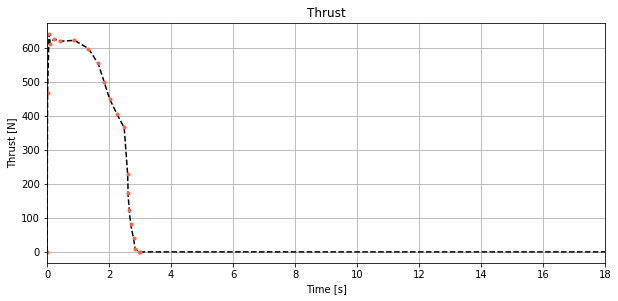

In [44]:
figure(figsize=(10, 15))
subplot(3,1,1)
plot(t_openr_thrust, thrust_openr, '--', color = 'black', label = 'Open Rocket Thrust')
plot(t_online_thrust, thrust_online, '.', color = 'tomato', label = 'Thrust')
xlim(0, 18)
grid()
title('Thrust')
xlabel('Time [s]')
ylabel('Thrust [N]')